In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV



%matplotlib inline



In [6]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.shape

(1599, 12)

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [146]:
#As per my observation:

#There is a big gap between 75% and max values of residual sugar column
#There is a big gap between 75% and max values of free sulfur dioxide column
#There is a huge gap between 75% and max value of total sulfur dioxide column
#All these gaps indicate that there are outliers present in our dataset which might need to be treated so as to get a better model accuracy later.

In [147]:
df.skew()  #Checking skewness

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

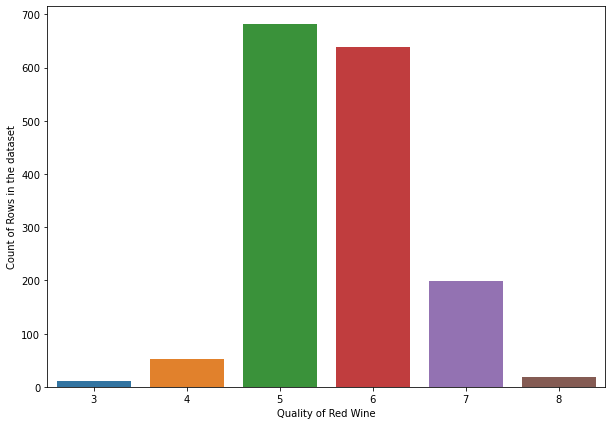

In [148]:
#Visualization of quality
plt.figure(figsize=(10,7))
sns.countplot(x ='quality', data = df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

In [150]:
#In the countplot representation we see the various categories of red wine quality and it shows that the number of data present for quality score 5 and 6 is way higher than it's counterparts. This indicates an imbalance which will need to be rectified so that our machine learning model do not get biased to a certain value during prediction.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

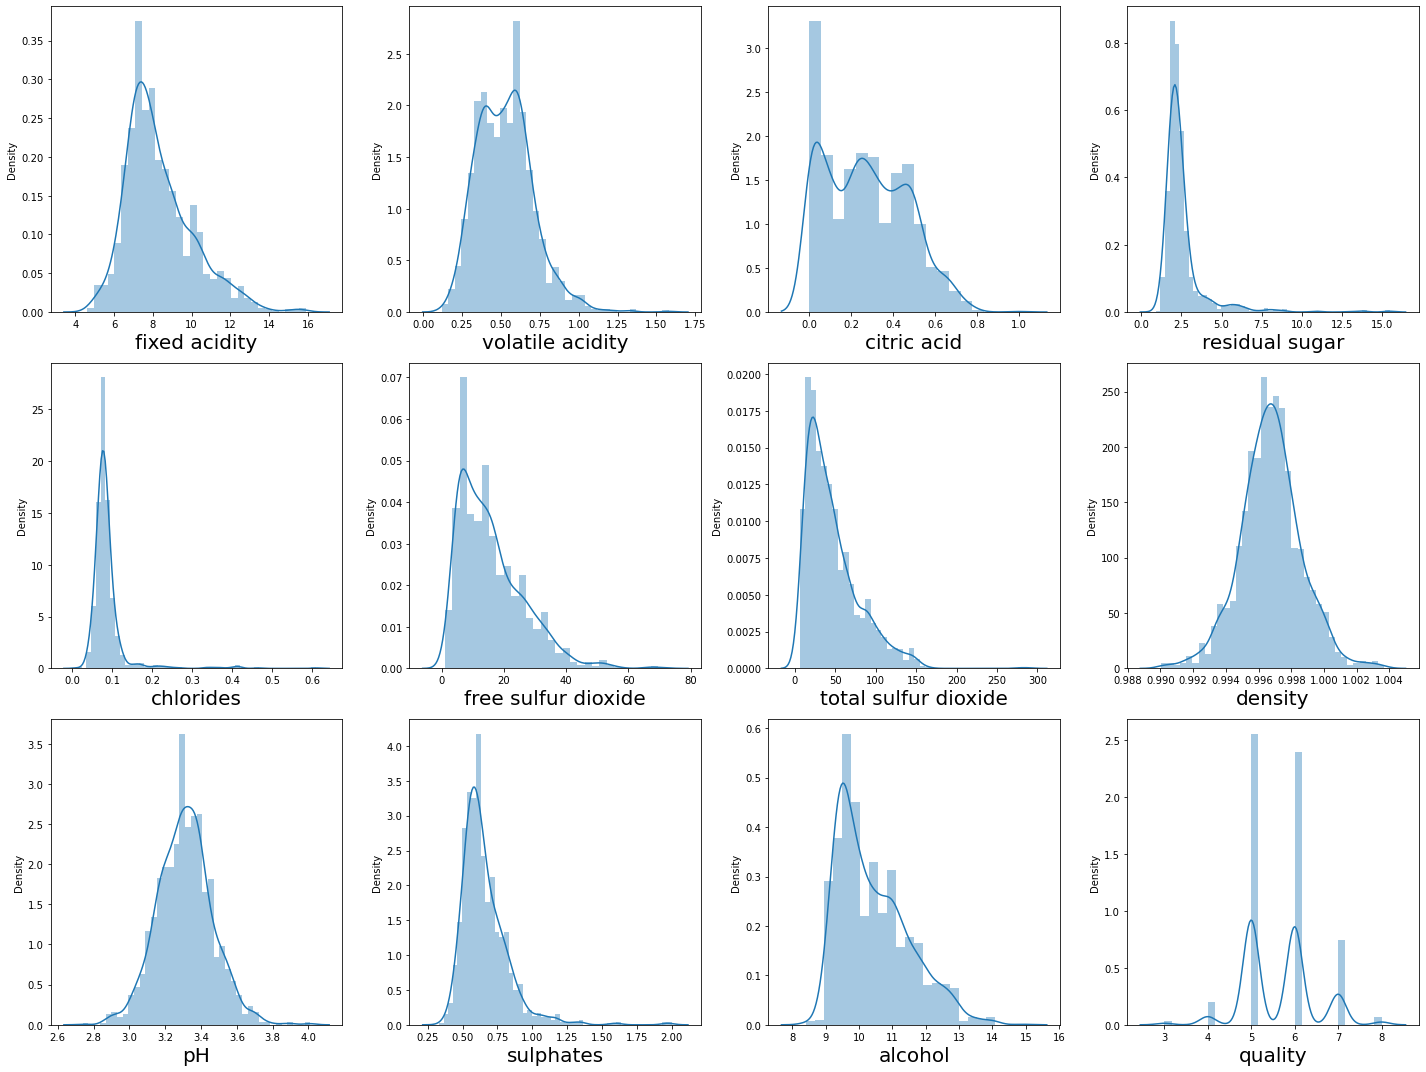

In [161]:

plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax= plt.subplot(3,4, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize =20 )
        
    plotnumber+=1
    
plt.tight_layout()


In [164]:
#Outliers are present in alcohol,sulphate, resudual sugar, citric acide

In [16]:
#Finding null values

In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

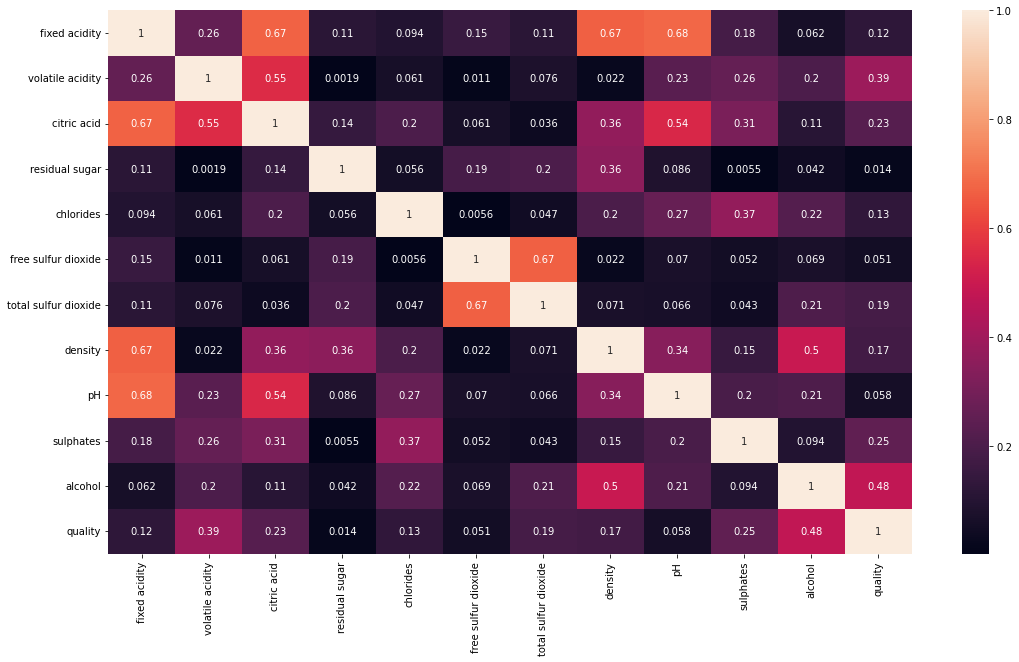

In [8]:
df_corr= df.corr().abs()  #This code will get coefficient of one variable to all other variable(Relationship)

plt.figure(figsize=(18,10))
sns.heatmap(df_corr, annot=True, annot_kws={"size":10})

plt.show()

In [9]:
#Observations:- 
#68% correlationship between fixed acidity & pH
#67% corr. between fixed acidity & density.
#Darker the color less the relationship
#Brighter the color higher the relationship


In [10]:
# Make Sure whether they are really correlated with each other by using scatter plot

In [19]:
x=df.drop(columns=["quality"])
y=df["quality"]

In [94]:
#Displaying y
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [88]:
y = y.apply(lambda y_value:1 if y_value>=7 else 0) # 1 is for good quality and 0 for bad (not good) quality
y # Displaying the label after applying label binarization

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [93]:
#Finding the counts

y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [95]:
#Displaying x
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [96]:
#Displaying y
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [97]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=41)

In [98]:
# Write a function & call to check accuracy score of different model

def metric_score (clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n =============Train Result===============")
        print(f"Accuracy score:{accuracy_score(y_train, y_pred)*100:.2f}%")
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print("\n =============Test Result================")
        print(f"Accuracy score:{accuracy_score(y_test, pred)*100:.2f}%")
        
        print("\n \n classification report \n", classification_report(y_test, pred, digits=2))
        

In [99]:
#Model initialization
# Trying for Decision tree Classifier

clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [100]:
# Call the function & pass the data set into it.

metric_score(clf, x_train, x_test, y_train, y_test, train=True)  # This is for trainig score
metric_score(clf, x_train, x_test, y_train, y_test, train=False)  #This is for testing score


 =============Train Result===============
Accuracy score:100.00%

 =============Test Result================
Accuracy score:88.50%

 
 classification report 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       339
           1       0.62      0.66      0.63        61

    accuracy                           0.89       400
   macro avg       0.78      0.79      0.78       400
weighted avg       0.89      0.89      0.89       400



In [101]:
# As per above our accuracy score of training data is 100% (Decision tree some of time overfit because it is rule based algorithm)
# Accuracy score of testing data is 89 %.
#F1 score is 78%, precision is 78%. 
#Hence iwe will try to increase score with use of hyperparameter tunning.


In [102]:
#Tunning four important parameters & passing different values for both parameters
grid_param={
    "criterion":["gini","entropy"],
    "max_depth":range(10,15),
    "min_samples_leaf":range(2,6),
    "min_samples_split":range(3,8),
    "max_leaf_nodes":range(5,10)
}

In [103]:
grid_search=GridSearchCV(estimator=clf,
                        param_grid=grid_param,
                        cv=5,
                        n_jobs=-1)

In [104]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [105]:
#Finding the best parameters
best_parameters=grid_search.best_params_

print(best_parameters)


{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 6, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [134]:
# Initiating new parameters in decision tree classifier & train

clf=DecisionTreeClassifier(criterion= "gini", max_depth= 12,min_samples_split=5, max_leaf_nodes= 6, min_samples_leaf=3, )

#training of model

clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=12, max_leaf_nodes=6, min_samples_leaf=3,
                       min_samples_split=5)

In [135]:
#Now call the function & pass the data set & train the model

metric_score(clf, x_train, x_test, y_train, y_test, train=True)  # This is for trainig score
metric_score(clf, x_train, x_test, y_train, y_test, train=False)  #This is for testing score



 =============Train Result===============
Accuracy score:88.74%

 =============Test Result================
Accuracy score:88.50%

 
 classification report 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       339
           1       0.70      0.43      0.53        61

    accuracy                           0.89       400
   macro avg       0.80      0.70      0.73       400
weighted avg       0.87      0.89      0.87       400



In [136]:
#After parameter tunning we got training accuracy score:88.74% & testing score:88.50%.
#F1 score is 73% & precisionscore:-80%

# Trying to solve with Knn model


In [138]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
x_scalar=scalar.fit_transform(x)

In [139]:
knn=KNeighborsClassifier()

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [140]:
metric_score(knn, x_train, x_test, y_train, y_test, train=True)

metric_score(knn, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:90.66%

 =============Test Result================
Accuracy score:84.00%

 
 classification report 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       339
           1       0.46      0.26      0.33        61

    accuracy                           0.84       400
   macro avg       0.67      0.60      0.62       400
weighted avg       0.81      0.84      0.82       400



In [141]:
# cross valiodation

#Hold out method-Train test split
# K fold cross validation:= if k=5 then it it train 5 iteration.
#LOOCV-Leave one out cross validation- No. of record no. of training. if milions of record then milions of training.High cost. rarely used in projects due to time & money.

In [142]:
#cross validation is to check whether the model is overfitting

from sklearn.model_selection import KFold, cross_val_score

In [143]:
cross_val_score(knn, x_scalar, y, cv=5)

array([0.865625  , 0.8375    , 0.88125   , 0.76875   , 0.85579937])

In [144]:
cross_val_score(KNeighborsClassifier(), x_scalar, y, cv=5).mean()

0.8417848746081505

In [79]:
#after cross validation we got accuracy score 84%